In [81]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [82]:
pd.set_option('display.max_columns', None)

In [89]:
df2 = pd.read_pickle (r'/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/orders_products_all.pkl')

In [90]:
df2.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spender,spending_flag,order_frequency,frequency_flag,state,age,date_joined,number_of_dependants,income,exists,region,customer_activity
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Fewest orders,10,New customer,14.0,High spender,30.0,Non-frequent customer,Alabama,31,2/17/2019,3,40423,both,South,Active


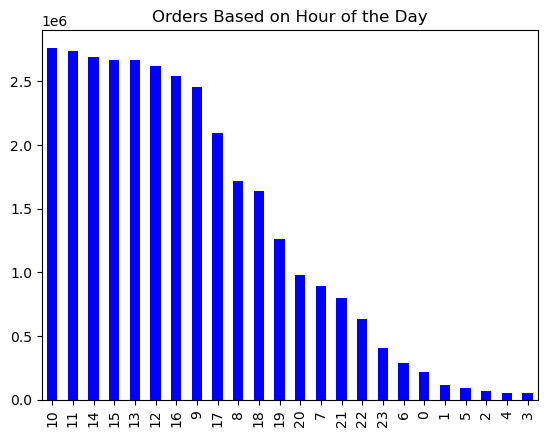

In [97]:
orders_based_hour_of_day_bar_chart = df2['order_hour_of_day'].value_counts().plot.bar(stacked = True, title = 'Orders Based on Hour of the Day',color = ['blue'])

In [98]:
orders_based_hour_of_day_bar_chart.figure.savefig((r'/Users/aaronreese/Desktop/Instacart Basket Analysis/4. Analysis/Visualizations/orders_based_hour_of_day_bar_chart.png'))

# ----------

In [114]:
df3 = pd.read_pickle (r'/Users/aaronreese/Desktop/Instacart Basket Analysis/2. Data/Prepared Data/4-10_profile_product_groups.pkl')

In [116]:
df3.head()

product_group,Baby care,Drink,Food,Non-consumable,Pet care
customer_profile,,,,,
Middle aged parent,143125,48585,723245,11372,31146
Middle aged single,47034,17804,240653,4082,10515
Old parent,93305,30879,483831,7707,21179
Old single,31017,10645,163179,2556,7339
Young parent,60659,22574,317285,5486,14325


In [115]:
df_graph_q2 = df3.groupby(['order_hour_of_day','productgroup']).size().unstack(fill_value = 0)

In [111]:
df_graph_q2.head()

order_frequency,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,43,69,258,378,717,990,1842,1909,2144,2273,3214,3330,5567,5757,4090,4179,3982,3766,4910,5621,4788,4596,3765,4272,3937,4300,5063,3776,129405
1,0,26,25,96,200,428,358,559,872,1190,1177,1206,1886,2349,2915,2867,2583,2398,1978,1906,2517,2816,2404,1981,1575,1840,1915,2251,2618,2120,68730
2,3,0,28,83,99,194,295,397,500,1038,732,801,1138,1290,1584,1846,1348,1367,1021,1440,1874,1617,1602,1025,1044,786,1312,1577,1556,1313,40521
3,0,3,29,49,96,214,153,351,353,671,527,576,996,1129,1124,1067,873,801,906,1310,1113,1100,1140,973,702,814,912,923,1400,711,30301
4,18,8,11,56,159,186,149,207,485,597,509,572,771,1269,1439,1070,1106,992,1214,1223,1156,1183,1289,1314,932,1023,762,1093,1416,1015,30059


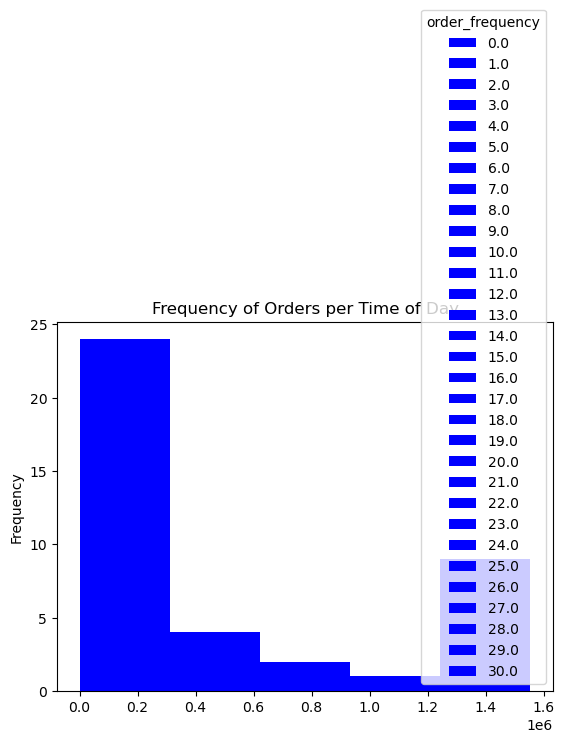

In [112]:
graph_q2= df_graph_q2.plot.hist(bins = 5, title = 'Products Sold Based on Time of Day',color = ['blue'])